In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from drawdata import ScatterWidget
from qbstyles import mpl_style

mpl_style(dark=True)

In [3]:
def model_line(model, X, y, color_dp3d="black", color_dp2d="red", color_line2d="white", color_line3d="white", alpha=0.5):
    if X.shape[1] == 1:  # 2D Case
        plt.scatter(X.iloc[:, 0], y, marker=".", color=color_dp2d, label="Data")
        y_pred = model.predict(X).flatten()
        plt.plot(X.iloc[:, 0], y_pred, color=color_line2d, label="Model Prediction")
        plt.xlabel(X.columns[0])
        plt.ylabel(y.name)
        plt.legend()

    elif X.shape[1] == 2:  # 3D Case
        plt.ion()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], y, color=color_dp3d, label="Data", marker=".")

        X_vals = X.iloc[:, 0]
        Y_vals = X.iloc[:, 1]
        Z_vals = model.predict(X).flatten()
        ax.plot_trisurf(X_vals, Y_vals, Z_vals, color=color_line3d, alpha=alpha)

        ax.set_xlabel(X.columns[0])
        ax.set_ylabel(X.columns[1])
        ax.set_zlabel(y.name)
        plt.legend()
        plt.show()

    else:
        raise ValueError("Only 1D or 2D features are supported.")


def predictor_line(model, X, y, dot_color="yellow", line_color="cyan", marker="."):
    pred = model.predict(X).flatten()
    y_true = y.to_numpy().flatten()
    start = min(y_true.min(), pred.min())
    end = max(y_true.max(), pred.max())
    line = np.linspace(start, end, 100)

    plt.scatter(y_true, pred, marker=marker, color=dot_color)
    plt.plot(line, line, color=line_color)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()


def model_equation(model, feature_names, target_label, variable_as_name=False):
    # Check if model is Keras (has get_weights)
    if hasattr(model, "get_weights"):
        weights = model.get_weights()
        coef = weights[0].flatten()
        intercept = weights[1].item()
    # Else assume it's sklearn
    elif hasattr(model, "coef_") and hasattr(model, "intercept_"):
        coef = model.coef_.flatten()
        intercept = model.intercept_.item() if hasattr(model.intercept_, 'item') else model.intercept_
    else:
        raise ValueError("Unsupported model type")

    # Variable name handling
    if variable_as_name:
        variables = [f"{name}" for name in feature_names]
        y = target_label
    else:
        variables = [f"x{i}" for i in range(1, len(feature_names) + 1)]
        y = "y"
        for variable, feature_name in zip(variables, feature_names):
            print(f"{variable} = {feature_name}")
        print(f"{y} = {target_label}")

    # Construct equation
    terms = [f"{coef[i]:.2f} * {variables[i]}" for i in range(len(coef))]
    equation = f"{y} = {terms[0]}"
    for term in terms[1:]:
        if term.startswith('-'):
            equation += f" - {term[1:]}"
        else:
            equation += f" + {term}"
    equation += f" + {intercept:.2f}" if intercept >= 0 else f" - {-intercept:.2f}"
    return equation


def loss_curve(history, color="blue"):
    plt.plot(history.history['loss'], color=color, label='Training Loss')
    plt.title('Model Loss Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

In [2]:
widget = ScatterWidget()

In [4]:
widget

ScatterWidget()

In [97]:
df = widget.data_as_pandas

In [99]:
df.head()

,x,y,color,label
0,15.850593,21.612644,#1f77b4,a
1,17.877092,14.271972,#1f77b4,a
2,7.246938,2.981069,#1f77b4,a
3,2.734400,6.844019,#1f77b4,a
4,20.610151,23.941473,#1f77b4,a


<Axes: xlabel='x', ylabel='y'>

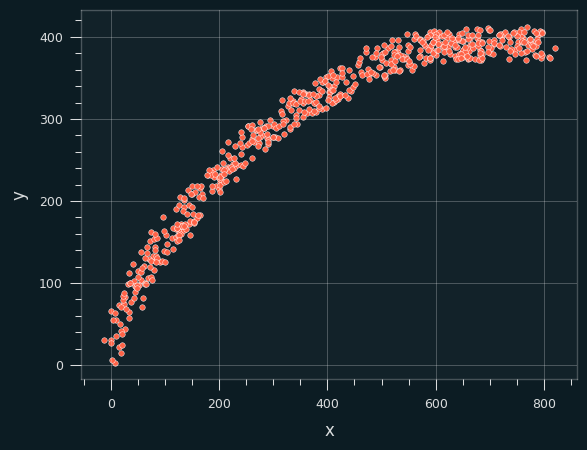

In [100]:
sns.scatterplot(
    data=df,
    x='x', y='y',
    color="tomato",
)

In [154]:
df['x'].corr(np.power(df['y'], 2.9)) ** 2

np.float64(0.9343809019870969)

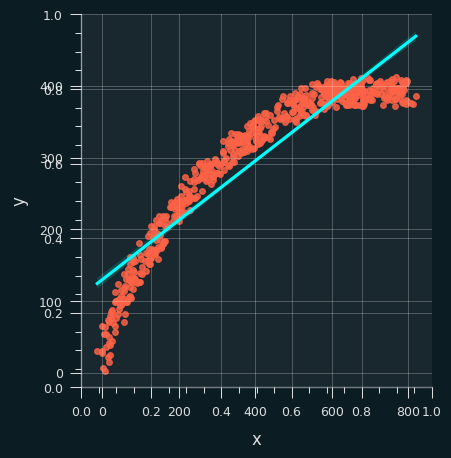

In [106]:
sns.lmplot(
    data=df,
    x='x', y='y',
    scatter_kws={"color": "tomato"},
    line_kws={"color": "cyan"},
)

In [149]:
features = ['x']
target = 'y'

X, y = df[features], np.power(df[target], 2.7)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [150]:
model_equation(model, features, target)

x1 = x
y = y


'y = 15368.49 * x1 - 197408.55'

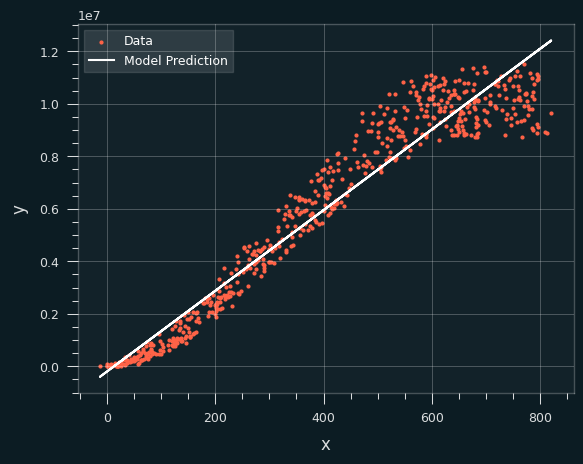

In [151]:
model_line(model, X, y, color_dp2d="tomato")

In [175]:
y_true = y
y_pred = model.predict(X)

r2_score(y_true, y_pred)

0.9343730691091068